In [1]:
import numpy as np
import pandas as pd
import scipy
import imageio
import math
import phylo

from PIL import Image
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
plt.style.use("seaborn-whitegrid")

In [2]:
%load_ext blackcellmagic

In [4]:
REGULAR_POKEMON = phylo.vectorize_pokemon(phylo.REGULAR_POKEMON_PATH)
#SHINY_POKEMON = phylo.vectorize_pokemon(phylo.SHINY_POKEMON_PATH)

Vectorizing pokemon from /Users/vineshkannan/Documents/GitHub/phylo/images/regular/
Vector iteration 0
Vector iteration 100
Vector iteration 200
Vector iteration 300
Vector iteration 400
Vector iteration 500
Vector iteration 600
Done vectorizing


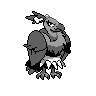

In [5]:
known_creatures = REGULAR_POKEMON[400:500]
phylo.unvectorize(known_creatures[0])

In [6]:
np.random.seed(42)
AF = len(known_creatures)
AT = len(known_creatures)
at_list = list(known_creatures)
af_list = [phylo.generate_random() for i in range(AF)]
train = af_list + at_list
X = np.array(train)
y = np.array([False for i in range(AF)] + [True for i in range(AT)])
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
print("Mean Accuracy = {0:.3f}".format(clf.score(X, y)))
print(clf.classes_)
clf.coef_

Mean Accuracy = 1.000
[False  True]


array([[-0.00118118, -0.0012504 , -0.00132023, ..., -0.00131051,
        -0.00116793, -0.00114431]])

In [7]:
w = clf.coef_
w

array([[-0.00118118, -0.0012504 , -0.00132023, ..., -0.00131051,
        -0.00116793, -0.00114431]])

In [58]:
def crossover(p1, p2):
    idx = np.random.randint(len(p1))
    c1 = np.array(list(p1[:idx]) + list(p2[idx:]))
    c2 = np.array(list(p2[:idx]) + list(p1[idx:]))
    return c1, c2
    
# initialize population
bois = list(REGULAR_POKEMON[230:240])
np.random.shuffle(bois)
population = bois
# while (termination criteria is reached) do
t = 0
while t < 500:
    # find fitness of population
    fits = clf.predict_proba(population)[:,1]
    fits = fits / fits.sum()
    # parent selection
    kids = []
    for i in range(4):
        pidx = np.random.choice(len(population), 2, p=fits)
        p1 = population[pidx[0]]
        p2 = population[pidx[1]]
        c1, c2 = crossover(p1, p2)
        kids.append(c1)
        kids.append(c2)
    # mutation with probability pm
    # decode and fitness calculation
    # survivor selection
    population = population + kids
    t += 1
    # find best
# return best
print("done")

done


In [61]:
fits = clf.predict_proba(population)[:,1]
pdf = pd.DataFrame()
pdf["population"] = pd.Series(population)
pdf["fitness"] = pd.Series(fits)
pdf.tail(5)

,population,fitness
4005,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.999999
4006,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.999997
4007,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.999998
4008,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.999998
4009,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.999998


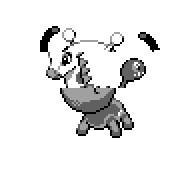

In [65]:
phylo.scale_img(phylo.unvectorize(population[3000]), 2)